# Splitting dataset to train and validation files

In [17]:
import numpy as np
import pandas as pd
import re as re
#import sys
#sys.path.insert(0,'..')

TRAIN_CSV = r'data\data\BankChurners.csv'
df = pd.read_csv(TRAIN_CSV, header = 0, dtype={'Age': np.float64})

df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [18]:
df['Attrition_Flag'] = df['Attrition_Flag'].map(({'Existing Customer': 1, 'Attrited Customer': 0}))

In [22]:
from settings.constants import TRAIN_CSV, VAL_CSV 
df.to_csv(TRAIN_CSV, index=False)

In [20]:
n = df.shape[0]
n_val = int(n * 0.2)
n_train = n - n_val

# Shuffle indeces
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]

In [21]:
from settings.constants import TRAIN_CSV, VAL_CSV 
df_train.to_csv(TRAIN_CSV, index=False)
df_val.to_csv(VAL_CSV, index=False)

# Import datasets

In [23]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

from settings.constants import TRAIN_CSV, VAL_CSV 

train = pd.read_csv(TRAIN_CSV, header = 0, dtype={'Customer_Age': np.float64})
val  = pd.read_csv(VAL_CSV , header = 0, dtype={'Customer_Age': np.float64})
full_data = [train, val]

train

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45.0,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,1,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,1,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,1,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,1,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50.0,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,0,41.0,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,0,44.0,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,0,30.0,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [2]:
train.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [3]:
# Setup
target = 'Attrition_Flag'

# Data preprocessing

In [152]:
from sklearn.preprocessing import LabelEncoder

# encode labels
le = LabelEncoder()

le.fit(train[target])
train[target] = le.transform(train[target]) # 1 - Existing, 0 - Attrited

In [153]:
train['IsAlone'] = 0
train.loc[train['Dependent_count'] == 0, 'IsAlone'] = 1
train[['IsAlone', target]].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Attrition_Flag
0,0,0.838231
1,1,0.850664


In [154]:
categorical_columns = ['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']
for col in categorical_columns:
    print(train[[col, target]].groupby([col], as_index=False).mean())

  Gender  Attrition_Flag
0      F        0.826428
1      M        0.853848
   Dependent_count  Attrition_Flag
0                0        0.850664
1                1        0.853645
2                2        0.842938
3                3        0.823572
4                4        0.834816
5                5        0.849057
  Education_Level  Attrition_Flag
0         College        0.847976
1       Doctorate        0.789357
2        Graduate        0.844309
3     High School        0.847988
4   Post-Graduate        0.821705
5      Uneducated        0.840619
6         Unknown        0.831468
  Marital_Status  Attrition_Flag
0       Divorced        0.838235
1        Married        0.848731
2         Single        0.830586
3        Unknown        0.827770
  Income_Category  Attrition_Flag
0         $120K +        0.826685
1     $40K - $60K        0.848603
2     $60K - $80K        0.865193
3    $80K - $120K        0.842345
4  Less than $40K        0.828138
5         Unknown        0.831835
  Car

In [155]:
# train[train['Months_on_book']==36]
# drop columns
drop_elements = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
train = train.drop(drop_elements, axis=1)

In [156]:
train

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,IsAlone
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,0,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0
10124,0,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0
10125,0,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0


# Category columns encoding

In [157]:
# encode labels
le = LabelEncoder()
col = 'Gender'
le.fit(train[col])
train[col] = le.transform(train[col])

In [158]:
train['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [159]:
train['Education_Level'] = train['Education_Level'].map({'Uneducated': 0, 'High School': 1, 'College':2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5, 'Unknown': None})
train['Education_Level'] = train['Education_Level'].fillna(train['Education_Level'].mode()[0])

In [160]:
train['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [161]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder()
col = 'Marital_Status'
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(train[[col]]).toarray())
column_name = enc.get_feature_names([col])
enc_df.rename(columns=dict(zip(range(4), column_name)), inplace=True)
train = train.join(enc_df)
train

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,IsAlone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,1,3,1.0,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0.0,1.0,0.0,0.0
1,1,49,0,5,3.0,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0.0,0.0,1.0,0.0
2,1,51,1,3,3.0,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0.0,1.0,0.0,0.0
3,1,40,0,4,1.0,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0.0,0.0,0.0,1.0
4,1,40,1,3,0.0,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,3.0,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,0.0,0.0,1.0,0.0
10123,0,41,1,2,3.0,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,1.0,0.0,0.0,0.0
10124,0,44,0,1,1.0,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,0.0,1.0,0.0,0.0
10125,0,30,1,2,3.0,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0,0.0,0.0,0.0,1.0


In [162]:
drop_elements = ['Marital_Status']
train = train.drop(drop_elements, axis=1)

In [163]:
col = 'Income_Category'
train[col].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [164]:
train[col] = train[col].map({'Less than $40K': 2, '$40K - $60K': 5, '$60K - $80K':7, '$80K - $120K': 10, '$120K +': 14, 'Unknown': None})
train[col] = train[col].fillna(train[col].mode()[0])
train

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,IsAlone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,1,3,1.0,7.0,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0.0,1.0,0.0,0.0
1,1,49,0,5,3.0,2.0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0.0,0.0,1.0,0.0
2,1,51,1,3,3.0,10.0,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0.0,1.0,0.0,0.0
3,1,40,0,4,1.0,2.0,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0.0,0.0,0.0,1.0
4,1,40,1,3,0.0,7.0,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,3.0,5.0,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,0.0,0.0,1.0,0.0
10123,0,41,1,2,3.0,5.0,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,1.0,0.0,0.0,0.0
10124,0,44,0,1,1.0,2.0,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,0.0,1.0,0.0,0.0
10125,0,30,1,2,3.0,5.0,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0,0.0,0.0,0.0,1.0


In [17]:
col = 'Card_Category'
train[col].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [18]:
train[col] = train[col].map({'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})
train

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,IsAlone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,1,3,1.0,7.0,0,39,5,1,...,1.335,1144,42,1.625,0.061,0,0.0,1.0,0.0,0.0
1,1,49,0,5,3.0,2.0,0,44,6,1,...,1.541,1291,33,3.714,0.105,0,0.0,0.0,1.0,0.0
2,1,51,1,3,3.0,10.0,0,36,4,1,...,2.594,1887,20,2.333,0.000,0,0.0,1.0,0.0,0.0
3,1,40,0,4,1.0,2.0,0,34,3,4,...,1.405,1171,20,2.333,0.760,0,0.0,0.0,0.0,1.0
4,1,40,1,3,0.0,7.0,0,21,5,1,...,2.175,816,28,2.500,0.000,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,3.0,5.0,0,40,3,2,...,0.703,15476,117,0.857,0.462,0,0.0,0.0,1.0,0.0
10123,0,41,1,2,3.0,5.0,0,25,4,2,...,0.804,8764,69,0.683,0.511,0,1.0,0.0,0.0,0.0
10124,0,44,0,1,1.0,2.0,0,36,5,3,...,0.819,10291,60,0.818,0.000,0,0.0,1.0,0.0,0.0
10125,0,30,1,2,3.0,5.0,0,36,4,3,...,0.535,8395,62,0.722,0.000,0,0.0,0.0,0.0,1.0


In [19]:
train.dtypes

Attrition_Flag                int32
Customer_Age                  int64
Gender                        int32
Dependent_count               int64
Education_Level             float64
Income_Category             float64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
IsAlone                       int64
Marital_Status_Divorced     float64
Marital_Status_Married      float64
Marital_Status_Single       float64
Marital_Status_Unknown      float64
dtype: object

In [20]:
train

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,IsAlone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,1,45,1,3,1.0,7.0,0,39,5,1,...,1.335,1144,42,1.625,0.061,0,0.0,1.0,0.0,0.0
1,1,49,0,5,3.0,2.0,0,44,6,1,...,1.541,1291,33,3.714,0.105,0,0.0,0.0,1.0,0.0
2,1,51,1,3,3.0,10.0,0,36,4,1,...,2.594,1887,20,2.333,0.000,0,0.0,1.0,0.0,0.0
3,1,40,0,4,1.0,2.0,0,34,3,4,...,1.405,1171,20,2.333,0.760,0,0.0,0.0,0.0,1.0
4,1,40,1,3,0.0,7.0,0,21,5,1,...,2.175,816,28,2.500,0.000,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,3.0,5.0,0,40,3,2,...,0.703,15476,117,0.857,0.462,0,0.0,0.0,1.0,0.0
10123,0,41,1,2,3.0,5.0,0,25,4,2,...,0.804,8764,69,0.683,0.511,0,1.0,0.0,0.0,0.0
10124,0,44,0,1,1.0,2.0,0,36,5,3,...,0.819,10291,60,0.818,0.000,0,0.0,1.0,0.0,0.0
10125,0,30,1,2,3.0,5.0,0,36,4,3,...,0.535,8395,62,0.722,0.000,0,0.0,0.0,0.0,1.0


In [21]:
col = target
train[col].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [46]:
y = train[target]
X = train.drop(target, axis=1)

In [47]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# define pipeline
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [48]:
from collections import Counter
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 5100, 0: 2550})


# DataLoader

In [4]:
import numpy as np
import pandas as pd

from settings.constants import TRAIN_CSV, VAL_CSV 

train = pd.read_csv(TRAIN_CSV, header = 0, dtype={'Customer_Age': np.float64})
val  = pd.read_csv(VAL_CSV , header = 0, dtype={'Customer_Age': np.float64})
full_data = [train, val]

train

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45.0,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49.0,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40.0,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40.0,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50.0,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41.0,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44.0,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30.0,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [15]:
from sklearn.preprocessing import LabelEncoder

# encode labels
le = LabelEncoder()

le.fit(train[target])
train[target] = le.transform(train[target]) # 1 - Existing, 0 - Attrited

In [6]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


class DataLoader(object):
    def fit(self, dataset):
        self.dataset = dataset.copy()

    def load_data(self):
        train = self.dataset
        # target = 'Attrition_Flag'

        # replace value
        train['IsAlone'] = 0
        train.loc[train['Dependent_count'] == 0, 'IsAlone'] = 1

        # encode labels
        le = LabelEncoder()

        # le.fit(train[target])
        # train[target] = le.transform(train[target]) # 1 - Existing, 0 - Attrited

        # encode labels
        col = 'Gender'
        le.fit(train[col])
        train[col] = le.transform(train[col])

        # encode labels one-hot-encoding
        #enc = OneHotEncoder()
        #col = 'Marital_Status'
        #enc_df = pd.DataFrame(enc.fit_transform(train[[col]]).toarray())
        #column_name = enc.get_feature_names([col])
        #enc_df.rename(columns=dict(zip(range(4), column_name)), inplace=True)
        #train = train.join(enc_df)
        col = 'Marital_Status'
        le.fit(train[col])
        train[col] = le.transform(train[col])

        # replace value and fill na
        col = 'Education_Level'
        train[col] = train[col].map(
            {'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5,
             'Unknown': None})
        train[col] = train[col].fillna(train[col].mode()[0])
        # replace value and fill na
        col = 'Income_Category'
        train[col] = train[col].map(
            {'Less than $40K': 2, '$40K - $60K': 5, '$60K - $80K': 7, '$80K - $120K': 10, '$120K +': 14,
             'Unknown': None})
        train[col] = train[col].fillna(train[col].mode()[0])
        # replace value and fill na
        col = 'Card_Category'
        train[col] = train[col].map({'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})

        # standardize
        cols = ['Customer_Age',
                'Total_Trans_Amt',
                'Total_Trans_Ct',
                'Months_on_book',
                'Credit_Limit',
                'Total_Revolving_Bal',
                'Avg_Open_To_Buy']
        train[cols] = (train[cols] - train[cols].mean()) / train[cols].std()
        
        # drop columns
        drop_elements = ['CLIENTNUM',
                         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
        train = train.drop(drop_elements, axis=1)

        self.dataset = train
        return self.dataset

In [4]:
dl = DataLoader()
dl.fit(train)
df = dl.load_data()
df

NameError: name 'DataLoader' is not defined

In [5]:
from utils.dataloader import DataLoader

X_raw = train.drop(target, axis=1)

loader = DataLoader()
loader.fit(X_raw)
X = loader.load_data()
y = train[target]

In [6]:
X

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165397,1,3,1,0.384602,5,1,3,0.446600,-0.473399,0.488947,1.335,-0.959659,-0.973847,1.625,0.061
1,0.333554,0,5,2,1.010665,6,1,2,-0.041365,-0.366649,-0.008486,1.541,-0.916387,-1.357273,3.714,0.105
2,0.583030,1,3,1,0.008964,4,1,0,-0.573669,-1.426788,-0.445636,2.594,-0.740945,-1.911111,2.333,0.000
3,-0.789087,0,4,3,-0.241461,3,4,1,-0.585222,1.661604,-0.734063,1.405,-0.951711,-1.911111,2.333,0.760
4,-0.789087,1,3,1,-1.869225,5,1,0,-0.430856,-1.426788,-0.302853,2.175,-1.056211,-1.570288,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458292,1,2,2,0.509814,3,2,3,-0.509304,0.844413,-0.584900,0.703,3.259197,2.221372,0.857,0.462
10123,-0.664349,1,2,0,-1.368375,4,2,3,-0.479157,1.255462,-0.591610,0.804,1.283411,0.176432,0.683,0.511
10124,-0.290135,0,1,1,0.008964,5,3,4,-0.354608,-1.426788,-0.226621,0.819,1.732908,-0.206995,0.818,0.000
10125,-2.036465,1,2,3,0.008964,4,3,3,-0.368691,-1.426788,-0.240701,0.535,1.174790,-0.121789,0.722,0.000


In [7]:
X.shape

(10127, 16)

# Models

In [12]:
y.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [13]:
def modelling():
    import matplotlib.pyplot as plt
    import seaborn as sns

    from sklearn.model_selection import StratifiedShuffleSplit
    from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
    from sklearn.linear_model import LogisticRegression

    classifiers = [
        KNeighborsClassifier(3),
        SVC(probability=True),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        LogisticRegression()

    ]

    log_cols = ["Classifier", "Accuracy", "ROC_AUC"]
    log = pd.DataFrame(columns=log_cols)

    sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

    acc_dict = {}
    roc_dict = {}

    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        for clf in classifiers:
            print(clf)
            name = clf.__class__.__name__
            clf.fit(X_train, y_train)
            train_predictions = clf.predict(X_test)
            acc = accuracy_score(y_test, train_predictions)
            roc = roc_auc_score(y_test, train_predictions)

            if name in acc_dict:
                acc_dict[name] += acc
            else:
                acc_dict[name] = acc
                
            if name in roc_dict:
                roc_dict[name] += roc
            else:
                roc_dict[name] = roc

    for clf in acc_dict:
        acc_dict[clf] = acc_dict[clf] / 10.0
        roc_dict[clf] = roc_dict[clf] / 10.0
        log_entry = pd.DataFrame([[clf, acc_dict[clf], roc_dict[clf]]], columns = log_cols)
        log = log.append(log_entry)
    fig, (ax1, ax2) = plt.subplots(2, 1)

    sns.set_color_codes("muted")
    sns.barplot(ax = ax1, x = 'Accuracy', y = 'Classifier', data = log, color = "b")
    sns.barplot(ax = ax2, x = 'ROC_AUC', y = 'Classifier', data = log, color = "g")
    return log

In [14]:
log = modelling()
log

KNeighborsClassifier(n_neighbors=3)


ValueError: could not convert string to float: 'Existing Customer'

In [77]:
y = train[target]
X = train.drop(target, axis=1)

KNeighborsClassifier(n_neighbors=3)
SVC(probability=True)
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
GaussianNB()
LinearDiscriminantAnalysis()
QuadraticDiscriminantAnalysis()
LogisticRegression()
KNeighborsClassifier(n_neighbors=3)
SVC(probability=True)
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
GaussianNB()
LinearDiscriminantAnalysis()
QuadraticDiscriminantAnalysis()
LogisticRegression()
KNeighborsClassifier(n_neighbors=3)
SVC(probability=True)
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
GaussianNB()
LinearDiscriminantAnalysis()
QuadraticDiscriminantAnalysis()
LogisticRegression()
KNeighborsClassifier(n_neighbors=3)
SVC(probability=True)
DecisionTreeClassifier()
RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
GaussianNB()
LinearDiscriminantAnalysis()
QuadraticDiscriminantAnalysis()
LogisticR

,Classifier,Accuracy,ROC_AUC
0,KNeighborsClassifier,0.891115,0.764049
0,SVC,0.839092,0.500000
0,DecisionTreeClassifier,0.934847,0.881345
0,RandomForestClassifier,0.961204,0.903992
0,AdaBoostClassifier,0.956466,0.908855
0,GradientBoostingClassifier,0.965745,0.916863
0,GaussianNB,0.896347,0.782538
0,LinearDiscriminantAnalysis,0.903751,0.784223
0,QuadraticDiscriminantAnalysis,0.800888,0.756399
0,LogisticRegression,0.877394,0.697115


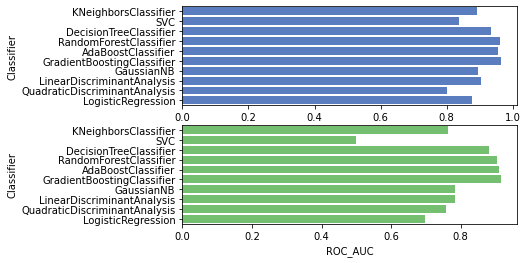

In [78]:
modelling()

In [16]:
import pickle
import json
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

from utils.dataloader import DataLoader 
from settings.constants import TRAIN_CSV


with open('settings/specifications.json') as f:
    specifications = json.load(f)

raw_train = pd.read_csv(TRAIN_CSV)
x_columns = specifications['description']['X']
y_column = specifications['description']['y']

X_raw = raw_train[x_columns]

loader = DataLoader()
loader.fit(X_raw)
X = loader.load_data()
y = raw_train[target]

In [17]:
# encode labels
le = LabelEncoder()

le.fit(y)
y = le.transform(y) # 1 - Existing, 0 - Attrited

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X, y)
with open('models/GBC.pickle', 'wb')as f:
    pickle.dump(model, f)

In [1]:
import pickle
import json
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

from utils.dataloader import DataLoader 
from settings. constants import VAL_CSV


with open('settings/specifications.json') as f:
    specifications = json.load(f)

x_columns = specifications['description']['X']
y_column = specifications['description']['y']

raw_val = pd.read_csv(VAL_CSV)
x_raw = raw_val[x_columns]

loader = DataLoader()
loader.fit(x_raw)
X = loader.load_data()
y = raw_val[target]

# encode labels
le = LabelEncoder()

le.fit(y)
y = le.transform(y) # 1 - Existing, 0 - Attrited

NameError: name 'target' is not defined

In [ ]:
loaded_model = pickle.load(open('models/GBC.pickle', 'rb'))
loaded_model.score(X, y)

# Prediction

In [1]:
import json
import requests
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import accuracy_score

from utils import *
from settings. constants import TRAIN_CSV, VAL_CSV

with open('settings/specifications.json') as f:
    specifications = json.load(f)
    
info = specifications['description']
x_columns, y_column, metrics = info['X'], info['y'], info['metrics']

train_set = pd.read_csv(TRAIN_CSV, header=0)
val_set = pd.read_csv(VAL_CSV, header=0)

train_x, train_y = train_set[x_columns], train_set[y_column]
val_x, val_y = val_set[x_columns], val_set[y_column]

loader = DataLoader()
loader.fit(val_x)
val_processed = loader.load_data()
print('data: ', val_processed[:10])

req_data = {'data': json.dumps(val_x.to_dict())}

data:     Customer_Age  Gender  Dependent_count  Marital_Status  Months_on_book  \
0     -0.294531       0                3               2        0.115687   
1      1.670222       1                1               2        1.466279   
2     -0.294531       0                3               2       -0.007094   
3     -0.171734       0                2               2       -0.007094   
4     -0.540125       1                4               0       -0.129875   
5      0.442251       1                2               2        0.975155   
6     -0.171734       0                4               2       -0.866562   
7     -0.417328       1                4               0       -0.007094   
8      0.810642       1                2               2       -0.007094   
9     -0.171734       1                3               2       -0.129875   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         3                       2                      1   


In [2]:
specifications['operations']

[{'operation_number': 1,
  'operation_name': 'replace',
  'params': {'in_columns': ['IsAlone'],
   'old_values': [0],
   'new_values': [1],
   'condition_columns': ['Dependent_count'],
   'conditions': ['equal'],
   'condition_values': [0],
   'defaults': [0],
   'inplaces': ['False']}},
 {'operation_number': 2,
  'operation_name': 'encode_labels',
  'params': {'in_columns': ['Gender', 'Marital_Status']}},
 {'operation_number': 3,
  'operation_name': 'replace',
  'params': {'in_columns': ['Education_Level',
    'Education_Level',
    'Education_Level',
    'Education_Level',
    'Education_Level',
    'Education_Level',
    'Education_Level'],
   'old_values': ['Uneducated',
    'High School',
    'College',
    'Graduate',
    'Post-Graduate',
    'Doctorate',
    'Unknown'],
   'new_values': [0, 1, 2, 3, 4, 5, 'None'],
   'inplaces': ['True', 'True', 'True', 'True', 'True', 'True', 'True']}},
 {'operation_number': 4,
  'operation_name': 'replace',
  'params': {'in_columns': ['Income_

In [3]:
eval(metrics)

<function utils.predictor.accuracy_score(actual, predicted)>

In [4]:
metrics

'accuracy_score'

In [5]:
len(info['final_columns'])

16

In [6]:
val_processed.shape

(2025, 16)

In [7]:
response = requests.get('http://127.0.0.1:5000/predict', data=req_data)
response

<Response [200]>

In [8]:
# encode labels
le = LabelEncoder()

le.fit(val_y)
val_y = le.transform(val_y) # 1 - Existing, 0 - Attrited

NameError: name 'LabelEncoder' is not defined

In [9]:
api_predict = response.json()['prediction']
print('predict: ', api_predict[:10])

api_score = eval(metrics)(val_y, api_predict)
print('accuracy: ', api_score)

predict:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 0]
accuracy:  0.9753086419753086


In [1]:
from utils.dataset import Dataset
from settings.constants import TRAIN_CSV, VAL_CSV
d = Dataset(TRAIN_CSV)

In [2]:
d.get_items(2)

data\train.csv
   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   

  

(   CLIENTNUM  Customer_Age Gender  Dependent_count Education_Level  \
 0  768805383            45      M                3     High School   
 1  818770008            49      F                5        Graduate   
 
   Marital_Status Income_Category Card_Category  Months_on_book  \
 0        Married     $60K - $80K          Blue              39   
 1         Single  Less than $40K          Blue              44   
 
    Total_Relationship_Count  ...  Credit_Limit  Total_Revolving_Bal  \
 0                         5  ...       12691.0                  777   
 1                         6  ...        8256.0                  864   
 
    Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
 0          11914.0                 1.335             1144              42   
 1           7392.0                 1.541             1291              33   
 
    Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
 0                1.625                  0.061   
 1                3.714     